In [235]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


In [236]:
df = pd.read_csv(r"C:\Users\marcos perrude\Documents\LCQAR\dados\vendas-anuais-de-glp-por-municipio.csv",encoding ='latin1')
df['TOTAL'] = df['P13'] + df['OUTROS']
df.rename(columns={'ï»¿ANO': 'ANO'}, inplace = True)
df.head()

,ANO,GRANDE REGIAO,UF,PRODUTO,CODIGO IBGE,MUNICIPIO,P13,OUTROS,TOTAL
0,1992,REGIÃO SUDESTE,RJ,GLP,3303500,NOVA IGUACU,32483584,1483879,33967463
1,1992,REGIÃO SUDESTE,RJ,GLP,3304558,RIO DE JANEIRO,103821744,14441443,118263187
2,1992,REGIÃO SUDESTE,RJ,GLP,3304906,SAO GONCALO,19136742,1489934,20626676
3,1992,REGIÃO NORDESTE,PI,GLP,2201909,BOM JESUS,564007,0,564007
4,1992,REGIÃO NORDESTE,PI,GLP,2202301,CANTO DO BURITI,260858,0,260858


In [237]:
# Converter kg para m³, e aplicar o fator de converte de Lb/galao -> kg/m³
df['TOTAL'] = ((df['TOTAL']/ 2.3)*0.12)
df.head()

,ANO,GRANDE REGIAO,UF,PRODUTO,CODIGO IBGE,MUNICIPIO,P13,OUTROS,TOTAL
0,1992,REGIÃO SUDESTE,RJ,GLP,3303500,NOVA IGUACU,32483584,1483879,1.772215e+06
1,1992,REGIÃO SUDESTE,RJ,GLP,3304558,RIO DE JANEIRO,103821744,14441443,6.170253e+06
2,1992,REGIÃO SUDESTE,RJ,GLP,3304906,SAO GONCALO,19136742,1489934,1.076174e+06
3,1992,REGIÃO NORDESTE,PI,GLP,2201909,BOM JESUS,564007,0,2.942645e+04
4,1992,REGIÃO NORDESTE,PI,GLP,2202301,CANTO DO BURITI,260858,0,1.360998e+04


In [238]:
#Proporção de butano e proprano é 50%/50%
TOTAL_50 = df['TOTAL']/2
TOTAL_50 = pd.DataFrame(TOTAL_50)
TOTAL_50.head()

,TOTAL
0,8.861077e+05
1,3.085127e+06
2,5.380872e+05
3,1.471323e+04
4,6.804991e+03


In [239]:
# Definir os fatores de emissão (AP42) para propano
tep = {
    'PMtotal': [0.7],
    'SO2': [0.010],
    'NOx': [13],
    'N20': [0.9],
    'CO2': [12.500],
    'CO': [7.5],
    'CH4': [0.2],
}
tep = pd.DataFrame(tep)
# Obter as taxas de emissões para propano
resultados = TOTAL_50['TOTAL'].values[:, np.newaxis] * tep.values
Taxa_propano = pd.DataFrame(resultados, columns=[f'TOTAL_{col}' for col in tep.columns])

# Exibir ou retornar o resultado
Taxa_propano.head()

,TOTAL_PMtotal,TOTAL_SO2,TOTAL_NOx,TOTAL_N20,TOTAL_CO2,TOTAL_CO,TOTAL_CH4
0,6.202754e+05,8861.077304,1.151940e+07,7.974970e+05,1.107635e+07,6.645808e+06,177221.546087
1,2.159589e+06,30851.266174,4.010665e+07,2.776614e+06,3.856408e+07,2.313845e+07,617025.323478
2,3.766610e+05,5380.872000,6.995134e+06,4.842785e+05,6.726090e+06,4.035654e+06,107617.440000
3,1.029926e+04,147.132261,1.912719e+05,1.324190e+04,1.839153e+05,1.103492e+05,2942.645217
4,4.763494e+03,68.049913,8.846489e+04,6.124492e+03,8.506239e+04,5.103743e+04,1360.998261


In [240]:

# Definir os fatores de emissão (AP42) para butano
teb = {

    'PMtotal': [0.8],
    'SO2': [0.09],
    'NOx': [15],
    'N20': [0.9],
    'CO2': [14.300],
    'CO': [8.4],
    'CH4': [0.2],
}
teb = pd.DataFrame(teb)

# Obter as taxas de emissões para butano
resultados = TOTAL_50['TOTAL'].values[:, np.newaxis] * teb.values
Taxa_butano = pd.DataFrame(resultados, columns=[f'TOTAL_{col}' for col in teb.columns])

# Exibir ou retornar o resultado
Taxa_butano.head()


,TOTAL_PMtotal,TOTAL_SO2,TOTAL_NOx,TOTAL_N20,TOTAL_CO2,TOTAL_CO,TOTAL_CH4
0,7.088862e+05,79749.695739,1.329162e+07,7.974970e+05,1.267134e+07,7.443305e+06,177221.546087
1,2.468101e+06,277661.395565,4.627690e+07,2.776614e+06,4.411731e+07,2.591506e+07,617025.323478
2,4.304698e+05,48427.848000,8.071308e+06,4.842785e+05,7.694647e+06,4.519932e+06,107617.440000
3,1.177058e+04,1324.190348,2.206984e+05,1.324190e+04,2.103991e+05,1.235911e+05,2942.645217
4,5.443993e+03,612.449217,1.020749e+05,6.124492e+03,9.731138e+04,5.716193e+04,1360.998261


In [241]:
print(type(Taxa_butano))  
print(type(Taxa_propano))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [242]:
taxa_total= Taxa_butano+Taxa_propano
taxa_total.head()

,TOTAL_PMtotal,TOTAL_SO2,TOTAL_NOx,TOTAL_N20,TOTAL_CO2,TOTAL_CO,TOTAL_CH4
0,1.329162e+06,88610.773043,2.481102e+07,1.594994e+06,2.374769e+07,1.408911e+07,3.544431e+05
1,4.627690e+06,308512.661739,8.638355e+07,5.553228e+06,8.268139e+07,4.905351e+07,1.234051e+06
2,8.071308e+05,53808.720000,1.506644e+07,9.685570e+05,1.442074e+07,8.555586e+06,2.152349e+05
3,2.206984e+04,1471.322609,4.119703e+05,2.648381e+04,3.943145e+05,2.339403e+05,5.885290e+03
4,1.020749e+04,680.499130,1.905398e+05,1.224898e+04,1.823738e+05,1.081994e+05,2.721997e+03


In [243]:
df = pd.concat([df, taxa_total],axis = 1)
df

,ANO,GRANDE REGIAO,UF,PRODUTO,CODIGO IBGE,MUNICIPIO,P13,OUTROS,TOTAL,TOTAL_PMtotal,TOTAL_SO2,TOTAL_NOx,TOTAL_N20,TOTAL_CO2,TOTAL_CO,TOTAL_CH4
0,1992,REGIÃO SUDESTE,RJ,GLP,3303500,NOVA IGUACU,32483584,1483879,1.772215e+06,1.329162e+06,88610.773043,2.481102e+07,1.594994e+06,2.374769e+07,1.408911e+07,3.544431e+05
1,1992,REGIÃO SUDESTE,RJ,GLP,3304558,RIO DE JANEIRO,103821744,14441443,6.170253e+06,4.627690e+06,308512.661739,8.638355e+07,5.553228e+06,8.268139e+07,4.905351e+07,1.234051e+06
2,1992,REGIÃO SUDESTE,RJ,GLP,3304906,SAO GONCALO,19136742,1489934,1.076174e+06,8.071308e+05,53808.720000,1.506644e+07,9.685570e+05,1.442074e+07,8.555586e+06,2.152349e+05
3,1992,REGIÃO NORDESTE,PI,GLP,2201909,BOM JESUS,564007,0,2.942645e+04,2.206984e+04,1471.322609,4.119703e+05,2.648381e+04,3.943145e+05,2.339403e+05,5.885290e+03
4,1992,REGIÃO NORDESTE,PI,GLP,2202301,CANTO DO BURITI,260858,0,1.360998e+04,1.020749e+04,680.499130,1.905398e+05,1.224898e+04,1.823738e+05,1.081994e+05,2.721997e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132745,2022,REGIÃO NORTE,TO,GLP,1721000,PALMAS,9779753,1555379,5.913982e+05,4.435486e+05,29569.909565,8.279575e+06,5.322584e+05,7.924736e+06,4.701616e+06,1.182796e+05
132746,2022,REGIÃO NORTE,TO,GLP,1721109,TOCANTINIA,80977,0,4.224887e+03,3.168665e+03,211.244348,5.914842e+04,3.802398e+03,5.661349e+04,3.358785e+04,8.449774e+02
132747,2022,REGIÃO NORTE,TO,GLP,1721208,TOCANTINOPOLIS,172429,25935,1.034943e+04,7.762070e+03,517.471304,1.448920e+05,9.314483e+03,1.386823e+05,8.227794e+04,2.069885e+03
132748,2022,REGIÃO NORTE,TO,GLP,1721307,TUPIRATINS,6175,0,3.221739e+02,2.416304e+02,16.108696,4.510435e+03,2.899565e+02,4.317130e+03,2.561283e+03,6.443478e+01


In [244]:
df_2022 = df.query('ANO == 2022')
df_2022

,ANO,GRANDE REGIAO,UF,PRODUTO,CODIGO IBGE,MUNICIPIO,P13,OUTROS,TOTAL,TOTAL_PMtotal,TOTAL_SO2,TOTAL_NOx,TOTAL_N20,TOTAL_CO2,TOTAL_CO,TOTAL_CH4
128080,2022,REGIÃO NORTE,AC,GLP,1200013,ACRELANDIA,358216,1125,18748.226087,14061.169565,937.411304,2.624752e+05,16873.403478,2.512262e+05,1.490484e+05,3749.645217
128081,2022,REGIÃO NORTE,AC,GLP,1200054,ASSIS BRASIL,147700,2430,7832.869565,5874.652174,391.643478,1.096602e+05,7049.582609,1.049605e+05,6.227131e+04,1566.573913
128082,2022,REGIÃO NORTE,AC,GLP,1200104,BRASILEIA,587062,22250,31790.191304,23842.643478,1589.509565,4.450627e+05,28611.172174,4.259886e+05,2.527320e+05,6358.038261
128083,2022,REGIÃO NORTE,AC,GLP,1200138,BUJARI,238544,0,12445.773913,9334.330435,622.288696,1.742408e+05,11201.196522,1.667734e+05,9.894390e+04,2489.154783
128084,2022,REGIÃO NORTE,AC,GLP,1200179,CAPIXABA,253832,0,13243.408696,9932.556522,662.170435,1.854077e+05,11919.067826,1.774617e+05,1.052851e+05,2648.681739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132745,2022,REGIÃO NORTE,TO,GLP,1721000,PALMAS,9779753,1555379,591398.191304,443548.643478,29569.909565,8.279575e+06,532258.372174,7.924736e+06,4.701616e+06,118279.638261
132746,2022,REGIÃO NORTE,TO,GLP,1721109,TOCANTINIA,80977,0,4224.886957,3168.665217,211.244348,5.914842e+04,3802.398261,5.661349e+04,3.358785e+04,844.977391
132747,2022,REGIÃO NORTE,TO,GLP,1721208,TOCANTINOPOLIS,172429,25935,10349.426087,7762.069565,517.471304,1.448920e+05,9314.483478,1.386823e+05,8.227794e+04,2069.885217
132748,2022,REGIÃO NORTE,TO,GLP,1721307,TUPIRATINS,6175,0,322.173913,241.630435,16.108696,4.510435e+03,289.956522,4.317130e+03,2.561283e+03,64.434783


<Axes: >

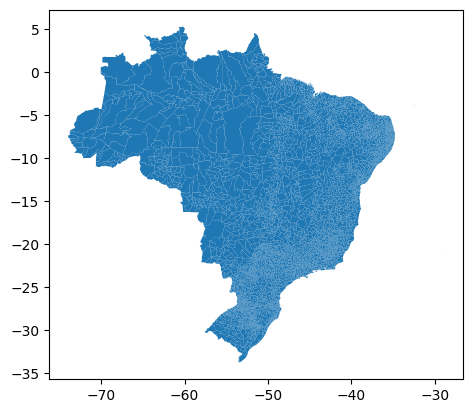

In [245]:
brasil_municipios = gpd.read_file(r"C:\Users\marcos perrude\Downloads\BR_Municipios_2022\BR_Municipios_2022.dbf")
brasil_municipios.plot()

In [196]:
brasil_municipios['CD_MUN'].dtypes

dtype('O')

In [246]:
brasil_municipios['CD_MUN'] = brasil_municipios['CD_MUN'].astype(int)
df_2022['CODIGO IBGE'] = df['CODIGO IBGE'].astype(int)
df_2022.rename(columns={'CODIGO IBGE': 'CD_MUN'}, inplace = True)

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_29064\3900573686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['CODIGO IBGE'] = df['CODIGO IBGE'].astype(int)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_29064\3900573686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.rename(columns={'CODIGO IBGE': 'CD_MUN'}, inplace = True)


In [247]:
df_merged_2022 = pd.merge(brasil_municipios, df_2022, on='CD_MUN', how='inner')

In [248]:

df_merged_2022['CD_MUN'] = df_merged_2022['CD_MUN'].astype(object)
df_merged_2022['CD_MUN'].dtypes

dtype('O')

In [255]:
df_merged_2022.

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,ANO,GRANDE REGIAO,UF,PRODUTO,MUNICIPIO,P13,OUTROS,TOTAL,TOTAL_PMtotal,TOTAL_SO2,TOTAL_NOx,TOTAL_N20,TOTAL_CO2,TOTAL_CO,TOTAL_CH4
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...",2022,REGIÃO NORTE,RO,GLP,ALTA FLORESTA D'OESTE,828726,16445,4.409588e+04,3.307191e+04,2204.793913,6.173423e+05,3.968629e+04,5.908848e+05,3.505622e+05,8819.175652
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",2022,REGIÃO NORTE,RO,GLP,ARIQUEMES,3115648,435219,1.852626e+05,1.389470e+05,9263.131304,2.593677e+06,1.667364e+05,2.482519e+06,1.472838e+06,37052.525217
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...",2022,REGIÃO NORTE,RO,GLP,CABIXI,187252,4840,1.002219e+04,7.516643e+03,501.109565,1.403107e+05,9.019972e+03,1.342974e+05,7.967642e+04,2004.438261
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...",2022,REGIÃO NORTE,RO,GLP,CACOAL,2941839,309811,1.696513e+05,1.272385e+05,8482.565217,2.375118e+06,1.526862e+05,2.273327e+06,1.348728e+06,33930.260870
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...",2022,REGIÃO NORTE,RO,GLP,CEREJEIRAS,674733,24010,3.645616e+04,2.734212e+04,1822.807826,5.103862e+05,3.281054e+04,4.885125e+05,2.898264e+05,7291.231304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84...",2022,REGIÃO CENTRO-OESTE,GO,GLP,VIANOPOLIS,127049,136716,1.376165e+04,1.032124e+04,688.082609,1.926631e+05,1.238549e+04,1.844061e+05,1.094051e+05,2752.330435
4666,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...",2022,REGIÃO CENTRO-OESTE,GO,GLP,VICENTINOPOLIS,278967,29545,1.609628e+04,1.207221e+04,804.813913,2.253479e+05,1.448665e+04,2.156901e+05,1.279654e+05,3219.255652
4667,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06...",2022,REGIÃO CENTRO-OESTE,GO,GLP,VILA BOA,104208,5630,5.730678e+03,4.298009e+03,286.533913,8.022950e+04,5.157610e+03,7.679109e+04,4.555889e+04,1146.135652
4668,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...",2022,REGIÃO CENTRO-OESTE,GO,GLP,VILA PROPICIO,0,1257,6.558261e+01,4.918696e+01,3.279130,9.181565e+02,5.902435e+01,8.788070e+02,5.213817e+02,13.116522


<Axes: >

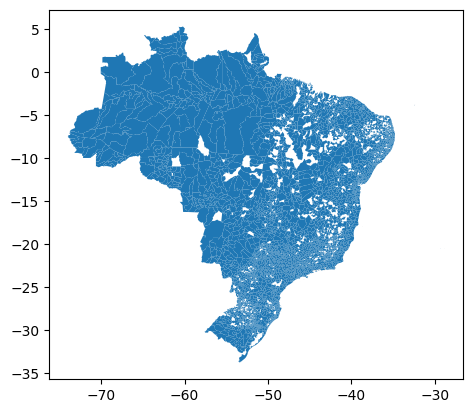

In [250]:
df_merged_2022.plot()

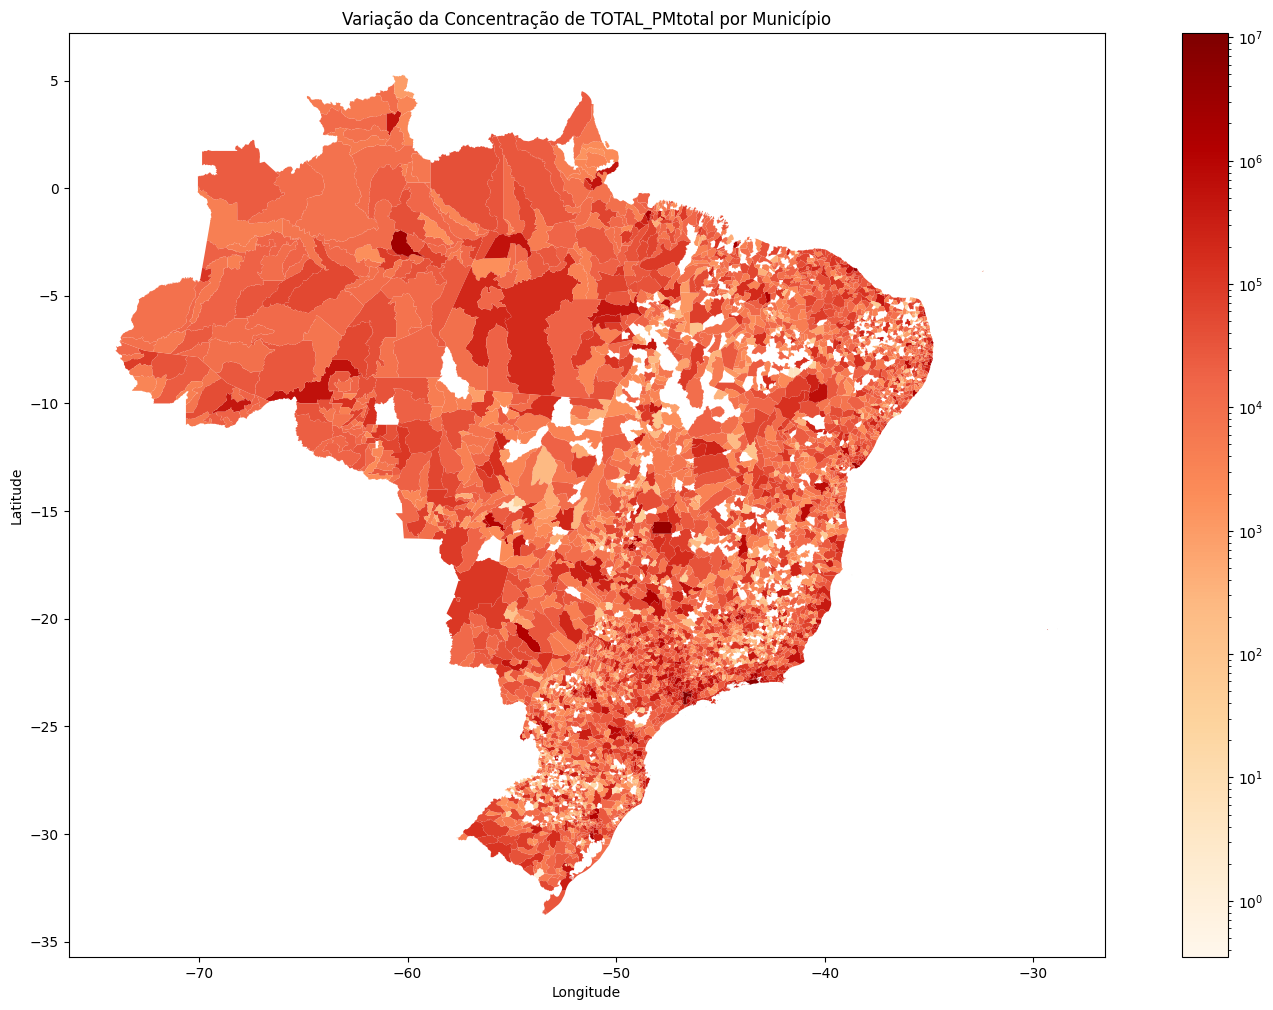

In [253]:
fig, ax = plt.subplots( 1, 1, figsize=(20, 12))
df_merged_2022.plot(column='TOTAL_PMtotal', cmap='OrRd', legend=True, ax=ax, alpha = 1, norm=matplotlib.colors.LogNorm() )

# Adicionar título e ajustar visualizações
plt.title('Variação da Concentração de TOTAL_PMtotal por Município')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o gráfico
plt.show()

In [263]:
mapa_SC = df_merged_2022.query('`SIGLA_UF` == "SC"')

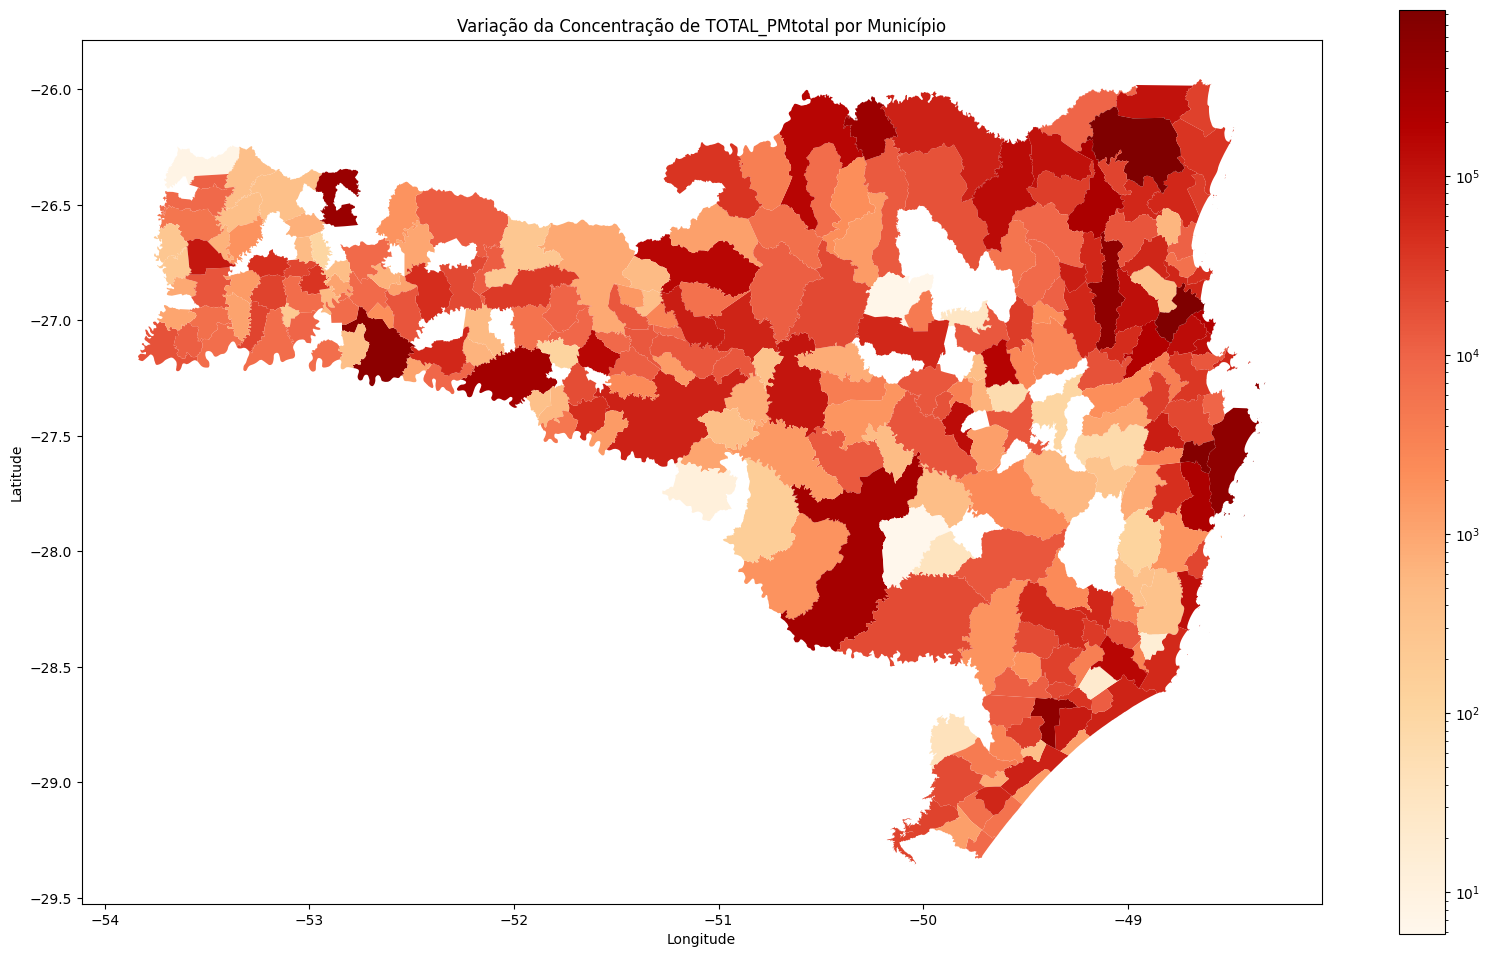

In [264]:
fig, ax = plt.subplots( 1, 1, figsize=(20, 12))
mapa_SC.plot(column='TOTAL_PMtotal', cmap='OrRd', legend=True, ax=ax, alpha = 1, norm=matplotlib.colors.LogNorm() )

# Adicionar título e ajustar visualizações
plt.title('Variação da Concentração de TOTAL_PMtotal por Município')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o gráfico
plt.show()

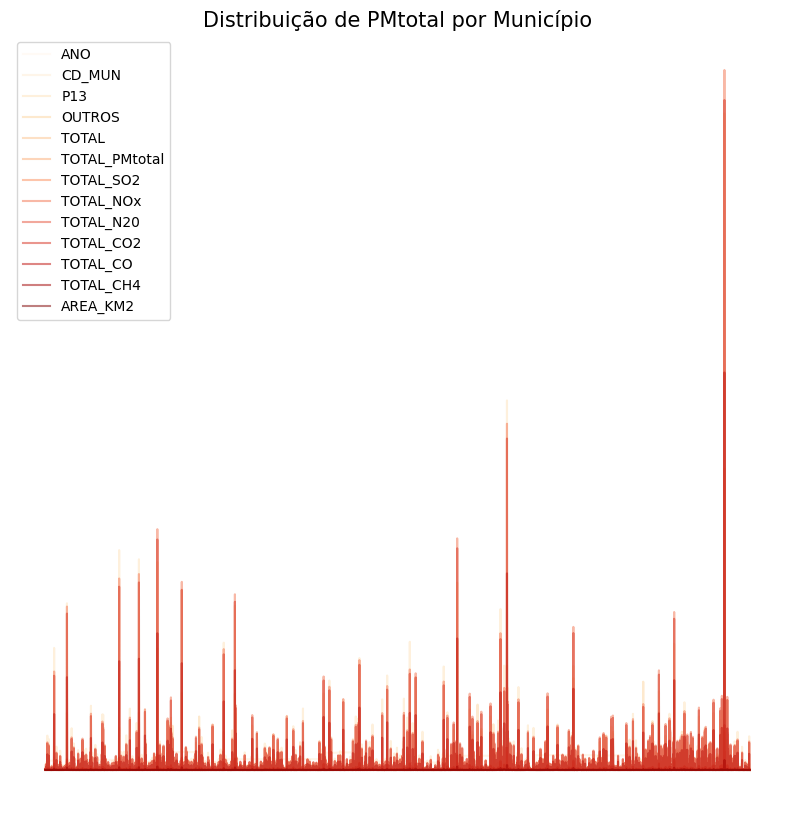

In [121]:


# 3. Plotar o mapa
brasil_municipios.plot(column='TOTAL_PMtotal', cmap='OrRd', legend=True, figsize=(10, 10), alpha = 0.5)

# Desativar eixos e adicionar título
plt.axis('off')
plt.title('Distribuição de PMtotal por Município', fontsize=15)

# Mostrar o gráfico
plt.show()

In [25]:
brasil_municipios

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Codigo,TOTAL_PMtotal
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...",1100015,1725.490888
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",1100023,7249.407108
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...",1100031,392.172703
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...",1100049,6638.529301
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...",1100056,1426.545255
...,...,...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84...",5222005,538.499433
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...",5222054,629.854367
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06...",5222203,224.243932
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...",5222302,2.566276


In [147]:
# Carrega o shapefile dos municípios brasileiros (ajuste o caminho para onde o arquivo shapefile está salvo)
brasil_municipios = gpd.read_file(r"C:\Users\marcos perrude\Documents\LCQAR\dados\BR_Municipios_2022.shp")

# Verifique as primeiras linhas do GeoDataFrame
print(brasil_municipios.head())


                                            geometry
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...
4  POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...
